3 types of time series patterns:
1. Trend
2. Seasonality
3. Cycles


we usually combine the trend and cycle into a single trend-cycle component (often just called the trend for simplicity). Thus we can think of a time series as comprising three components: a trend-cycle component, a seasonal component, and a remainder component (containing anything else in the time series)

## Transformations and Adjustments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Simulated retail sales data
data = {
    'Month': pd.date_range(start='2022-01-01', periods=12, freq='MS'),
    'Total_Sales': [31000, 28000, 30000, 32000, 35000, 33000, 37000, 36000, 34000, 38000, 40000, 39000]
}

df = pd.DataFrame(data)

In [2]:
len(df)

12

In [3]:
df.head()

,Month,Total_Sales
0,2022-01-01,31000
1,2022-02-01,28000
2,2022-03-01,30000
3,2022-04-01,32000
4,2022-05-01,35000


Adjusting the historical data can often lead to a simpler time series (easier to model). We remove sources of variation and make pattern consistent. 

Here, we deal with four kinds of adjustments: 
1. calendar adjustments
2. population adjustments
3. inflation adjustments 
4. mathematical transformations.


These adjustments help you see the true pattern in the data by removing things that are not part of the real trend (like more days in a month or inflation).

### Calender Adjustment

Some months have more days than others. So instead of total sales, we use average per day to make months comparable.

In [4]:
df['Days'] = df['Month'].dt.days_in_month

# Adjust sales per trading day
df['Sales_per_day'] = df['Total_Sales'] / df['Days']

df.head()

,Month,Total_Sales,Days,Sales_per_day
0,2022-01-01,31000,31,1000.000000
1,2022-02-01,28000,28,1000.000000
2,2022-03-01,30000,31,967.741935
3,2022-04-01,32000,30,1066.666667
4,2022-05-01,35000,31,1129.032258


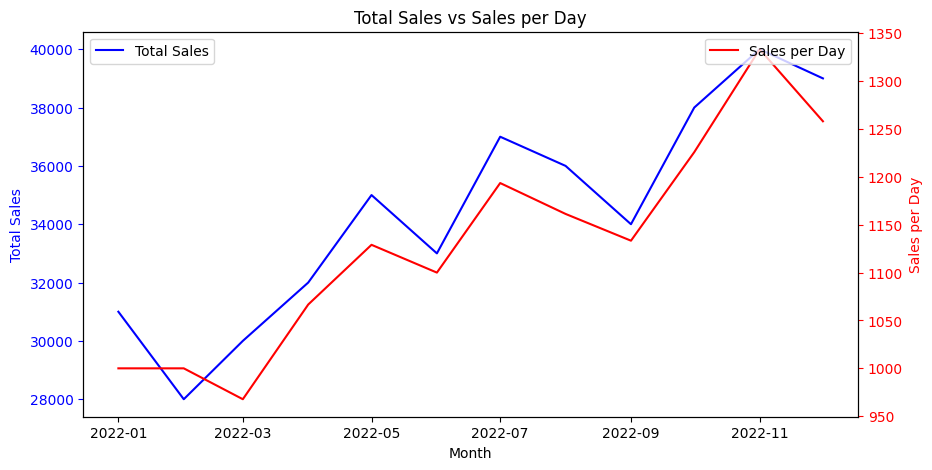

In [5]:
# plot dual axis
# 1. Total sales
# 2. Sales per day
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(df['Month'], df['Total_Sales'], color='blue', label='Total Sales')
ax2.plot(df['Month'], df['Sales_per_day'], color='red', label='Sales per Day')

ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales', color='blue')
ax2.set_ylabel('Sales per Day', color='red')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Total Sales vs Sales per Day')
plt.show()

### Simulate GDP and Population

Total values can be misleading if population changes. We divide by population to get per person data.



In [6]:
data = {
    'Year': list(range(2015, 2025)),
    'GDP': [1200, 1300, 1350, 1400, 1450, 1500, 1550, 1580, 1600, 1620],
    'Population': [20, 21, 21.5, 22, 23, 24, 25, 26, 26.5, 27]  # in millions
}

df = pd.DataFrame(data)

df.head()

,Year,GDP,Population
0,2015,1200,20.0
1,2016,1300,21.0
2,2017,1350,21.5
3,2018,1400,22.0
4,2019,1450,23.0


In [7]:
df['GDP_per_capita'] = df['GDP'] / df['Population']

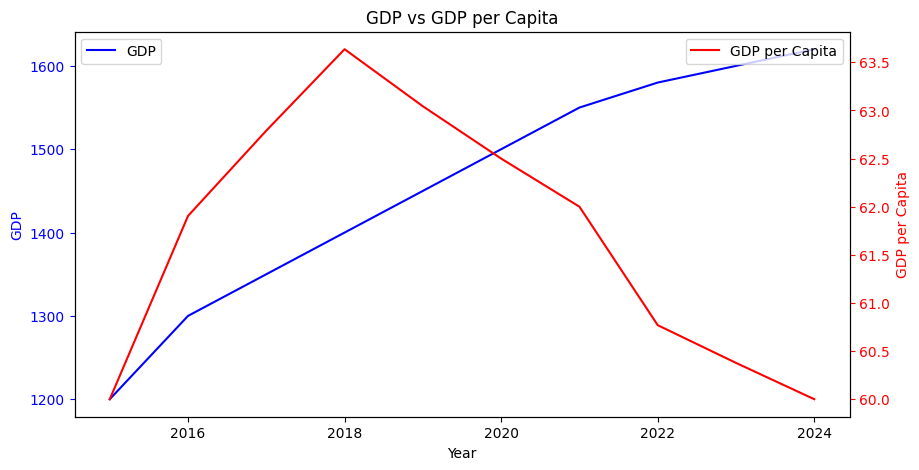

In [8]:
# plot dual axis
# 1. GDP
# 2. GDP per capita
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(df['Year'], df['GDP'], color='blue', label='GDP')
ax2.plot(df['Year'], df['GDP_per_capita'], color='red', label='GDP per Capita')

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='blue')
ax2.set_ylabel('GDP per Capita', color='red')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('GDP vs GDP per Capita')
plt.show()

### Inflation Adjustment – Using CPI

Money loses value over time. We use CPI (Consumer Price Index) to adjust prices to a base year.



In [9]:
data = {
    'Year': list(range(2010, 2020)),
    'House_Price': [200000, 210000, 220000, 235000, 250000, 265000, 280000, 290000, 300000, 320000],
    'CPI': [90, 92, 94, 96, 98, 100, 102, 104, 106, 108]  # CPI base year is 2015 (CPI=100)
}

df = pd.DataFrame(data)
df.head()

,Year,House_Price,CPI
0,2010,200000,90
1,2011,210000,92
2,2012,220000,94
3,2013,235000,96
4,2014,250000,98


In [10]:
cpi_base = 100
cpi_2015 = df[df['Year'] == 2015]['CPI'].values[0]
df['Adjusted_Price'] = df['House_Price'] / df['CPI'] * cpi_base

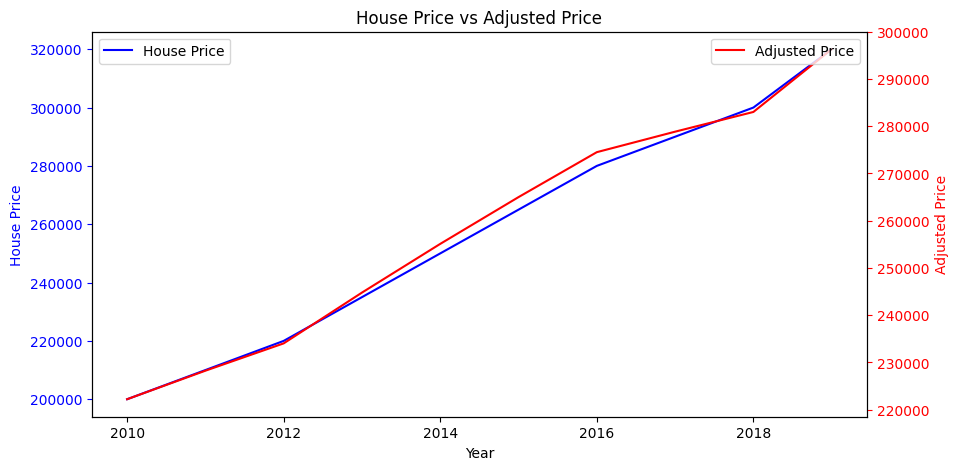

In [11]:
# plot dual axis
# 1. House price
# 2. Adjusted price
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(df['Year'], df['House_Price'], color='blue', label='House Price')
ax2.plot(df['Year'], df['Adjusted_Price'], color='red', label='Adjusted Price')

ax1.set_xlabel('Year')
ax1.set_ylabel('House Price', color='blue')
ax2.set_ylabel('Adjusted Price', color='red')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('House Price vs Adjusted Price')
plt.show()

## Mathematical Transformations

Sometimes your time series might show changing variance over time (e.g., increasing trend with increasing fluctuation). This can make modeling harder. Transformations like logarithms or Box-Cox can stabilize variance, make patterns more regular, and improve forecasting accuracy.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.datasets import co2  # using co2 as a gas-like time series

# Load dataset (weekly CO2 data)
data = co2.load_pandas().data
data = data.fillna(method='ffill')  # fill missing
data = data.resample('Q').mean()    # make it quarterly
data.columns = ['Gas']
data = data.reset_index()


/tmp/ipykernel_52499/1484317749.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # fill missing
/tmp/ipykernel_52499/1484317749.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data = data.resample('Q').mean()    # make it quarterly


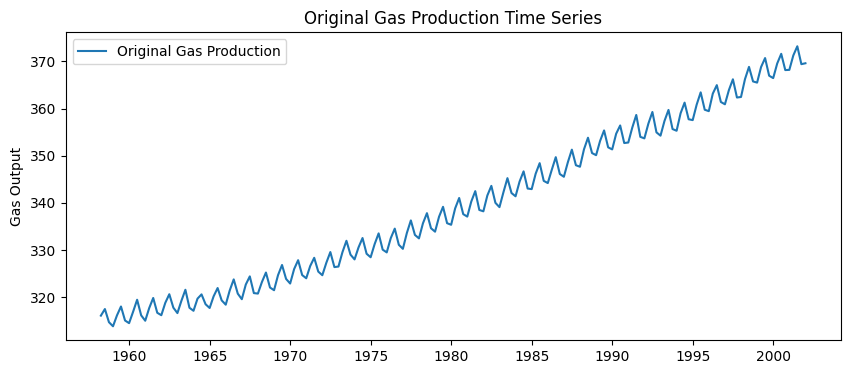

In [16]:
# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(data['index'], data['Gas'], label='Original Gas Production')
plt.title('Original Gas Production Time Series')
plt.ylabel('Gas Output')
plt.legend()
plt.show()

### 📉 Why Do We Transform Time Series Data?

#### 1. **Stabilize Variance (Heteroscedasticity)**

If the *magnitude of fluctuations grows with time*, that’s called **heteroscedasticity**. It violates assumptions of many time series models like ARIMA or exponential smoothing, which assume **constant variance**.

🔍 **Example**:
If gas production goes from 100 → 200 → 400, the size of seasonal ups/downs also grows. This makes it hard for a model to treat all parts of the series equally.

---

#### 2. **Make Relationships Linear**

Some time series relationships (like between sales and time, or prices and demand) are **multiplicative**. Applying a log or Box-Cox can make those **additive** (linear), which are easier to model.

---

#### 3. **Improve Forecasting Accuracy**

Models often perform better when:

* The series has constant variance
* Additive seasonality is clearer
* Residuals are homoscedastic and normally distributed

Transforming the series helps **meet these conditions**.

---

#### 4. **Interpretability in Percent Terms (Log Scale)**

Log transformations make changes **relative**, so a change of `+0.1` means a percentage increase, regardless of original scale.

---

### 📊 Why You Might Not *See* the Need on the Chart

* Your eyes are good at picking up **trends**, but not **variance instability**.
* Even subtle **nonlinear variance** can degrade model performance significantly.
* You might see a chart where the **amplitude of seasonal swings grows over time**, but not register it unless you overlay it with standardized variance lines.

---

### 📌 Example (Australian Gas Production)

Take a look at this simulated example:

#### Before Transformation

* Seasonality appears to get **bigger** over time.

#### After Box-Cox (λ \~ 0.1)

* Seasonality becomes **uniform**.
* Model fits and forecasts improve.
